In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Read the Clean Data
data = pd.read_csv('pima_diabetes_clean.csv')
array = data.values
X_Orginal = array[:,0:8]
Y_Orginal = array[:,8]
data.head()
#Read the data with 30 percent noisy rows
data1 = pd.read_csv('pima_diabetes_30_per.csv')
array = data1.values
X_Noise = array[:,0:8]
Y_Noise = array[:,8]
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,3.971715,147.056372,70.956019,36.397967,2.997910,36.632056,5.001434,1
1,1,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000,0
2,8,183.000000,64.000000,0.000000,0.000000,23.300000,0.672000,32.000000,1
3,4,1.400206,88.515605,67.593096,21.723057,93.492696,28.468973,1.135593,0
4,5,2.426937,137.130948,36.746923,33.618112,166.694499,44.847499,1.852417,1


In [9]:
#Correlations in Original Data
correlations = data.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [10]:
#Correlations in Noisy Data
correlations = data1.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.240621
Age                         0.150810
BMI                         0.125216
BloodPressure               0.103825
Insulin                     0.097383
DiabetesPedigreeFunction    0.018323
SkinThickness              -0.009254
Pregnancies                -0.038983
Name: Outcome, dtype: float64

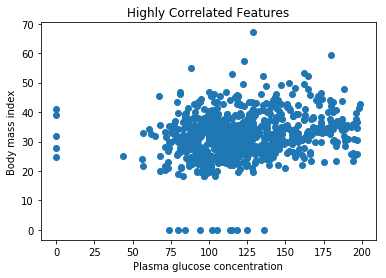

In [11]:
#Visualizing the Original Data
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data)

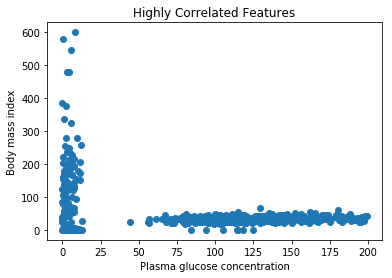

In [12]:
#Visualizing the Noisy Data
def visualise(data1):
    fig, ax = plt.subplots()
    ax.scatter(data1.iloc[:,1].values, data1.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data1)

In [13]:
#Cleaning up  original data

data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

In [14]:
#Cleaning up noisy data

data1[['Glucose','BMI']] = data1[['Glucose','BMI']].replace(0, np.NaN)
data1.dropna(inplace=True)

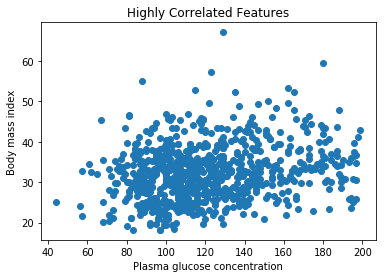

In [15]:
#Visualize Clean Data
visualise(data)

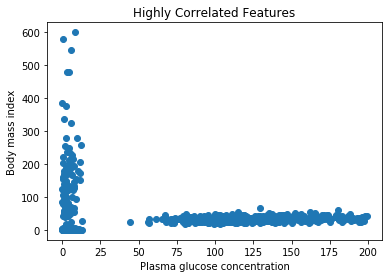

In [16]:
#Visualize Noisy Data
visualise(data1)

In [17]:
#Assigning values for original data

X = data[['Glucose','BMI']].values
y = data[['Outcome']].values

In [18]:
#Assigning values for Noisy data

X1 = data1[['Glucose','BMI']].values
y1 = data1[['Outcome']].values

In [19]:
#Pre-processing for Original Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [21]:
print(X[0:10,:])

[[ 0.85211873  0.16540919]
 [-1.2079944  -0.84552075]
 [ 1.99662603 -1.322102  ]
 [-1.07719357 -0.62889291]
 [ 0.49241644  1.53738552]
 [-0.19428794 -0.98993931]
 [-1.43689586 -0.21007908]
 [-0.22698815  0.41092074]
 [ 2.45442895 -0.28228836]
 [-0.39048919  0.74308343]]


In [22]:
#Pre-processing for Noisy Data
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X1 = sc.fit_transform(X1)

In [23]:
mean = np.mean(X1, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X1, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [24]:
print(X1[0:10,:])

[[-1.53464293 -0.68252434]
 [-0.13873354 -0.29924645]
 [ 1.54955493 -0.35283564]
 [-1.57894342  0.78703409]
 [-1.56125549  1.97576917]
 [ 0.39531689 -0.3154856 ]
 [-0.25932557 -0.22779419]
 [ 0.37808946 -0.15796584]
 [-1.5089724   8.13657897]
 [ 0.29195229 -0.1206158 ]]


In [25]:
#Test-Train split for Original Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
#Test-Train Split for Noisy Data
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [27]:
#Modelling with Noisy Training Data and Clean Test data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_1, y_train_1.ravel())
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94 10]
 [22 25]]


In [29]:
#Calculate F1 score
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

#F1 Score Computation

F1 = 2 * (precision * recall) / (precision + recall)

print("F1 Score %f" %(F1))

Precision: 0.903846 Recall 0.810345
F1 Score 0.854545


In [30]:
# Accuracy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_Noise, Y_Orginal, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.741 (0.049)


In [31]:
# Area Under AUC

scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X_Noise, Y_Orginal, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.777 (0.059)


In [32]:
# Classification Report

from sklearn.metrics import classification_report

model.fit(X_train_1, y_train_1)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       104
          1       0.71      0.53      0.61        47

avg / total       0.78      0.79      0.78       151



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
